In [1]:
from actorcritic import ActorCriticAgent, EnvironmentWrapper
import gymnasium as gym
import datetime
import numpy as np

In [2]:
# hyperparameters
config = {
    'experiment': 'CartPole',
    'device': 'cuda',
    'state_size': 6, 
    'action_size': 3,
    'hidden_sizes': [64, 128, 64], 
    'lr_actor': 0.001,
    'lr_critic': 0.005,
    'verbosity': 10,
    'env_name': 'CartPole-v1',
    'gamma': 0.99, 
    'reward_threshold': 475.0,
    'max_episodes': 2000,
    'max_steps': 500,
    'update_frequency': 500

}

In [ ]:
# Initialize the environment
env = gym.make(config['env_name'])
env_wrapper = EnvironmentWrapper(env)

# Initialize the ActorCriticAgent
agent = ActorCriticAgent(config)

In [4]:
results = agent.train(env_wrapper, max_episodes=config['max_episodes'], max_steps=config['max_steps'], reward_threshold=config['reward_threshold'], update_frequency=config['update_frequency'])

Episode 0, Avg Reward: 21.0, PLoss: 22.901447296142578, VLoss: 20.740175247192383
Episode 10, Avg Reward: 21.363636363636363, PLoss: 18.49374771118164, VLoss: 29.28343391418457
Episode 20, Avg Reward: 19.142857142857142, PLoss: -5.53304386138916, VLoss: 275.80316162109375
Episode 30, Avg Reward: 17.870967741935484, PLoss: -1.8028039932250977, VLoss: 75.41276550292969
Episode 40, Avg Reward: 17.26829268292683, PLoss: 2.2892675399780273, VLoss: 34.68743896484375
Episode 50, Avg Reward: 18.15686274509804, PLoss: -1.8873939514160156, VLoss: 539.8958129882812
Episode 60, Avg Reward: 18.0, PLoss: 2.210094451904297, VLoss: 402.4776306152344
Episode 70, Avg Reward: 17.43661971830986, PLoss: 18.657167434692383, VLoss: 14.807635307312012
Episode 80, Avg Reward: 16.88888888888889, PLoss: 6.299059867858887, VLoss: 20.182687759399414
Episode 90, Avg Reward: 17.153846153846153, PLoss: -10.282560348510742, VLoss: 354.6340026855469
Episode 100, Avg Reward: 17.82, PLoss: -15.543256759643555, VLoss: 253

In [5]:
# Save the models
agent.save_models()

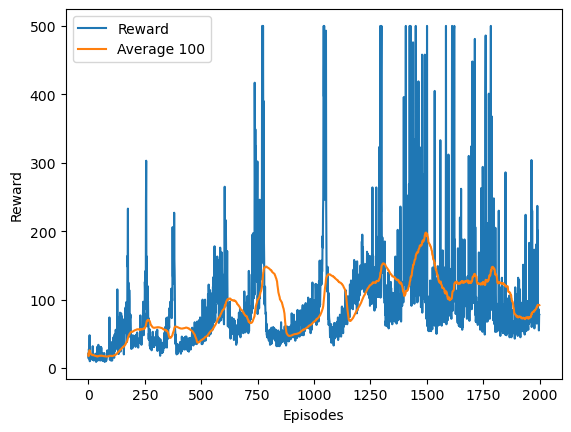

In [6]:
# plot results
import matplotlib.pyplot as plt

plt.plot(results['Episode'], results['Reward'], label='Reward')
plt.plot(results['Episode'], results['Average_100'], label='Average 100')
plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.legend()
plt.show()


In [7]:
np.save(f'results/{config["experiment"]}', results)

In [12]:
%load_ext tensorboard


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [13]:
%tensorboard --logdir runs/